In [44]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets
import matplotlib.pyplot as plt

from s7_datasets import load_data_S7
from models import S7_Model,model_summary
from utils import train_S7,test_S7,plot_acc_loss_S7

In [45]:
use_cuda = torch.cuda.is_available()  # Check if CUDA (GPU support) is available
device = torch.device("cuda" if use_cuda else "cpu")  # Select GPU if available, otherwise fall back to CPU
device  # Display the selected device

device(type='cpu')

In [46]:
trainloader , testloader = load_data_S7(batch_size=256)

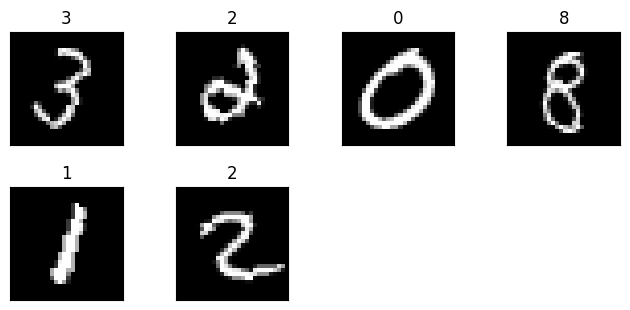

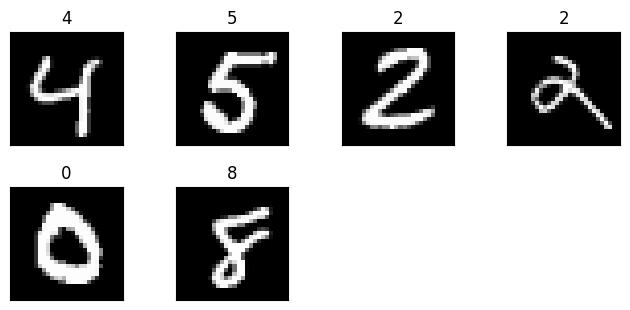

In [47]:
def plot_image(loader,no_images):
    batch_data, batch_label = next(iter(loader))
    _ = plt.figure()

    for i in range(no_images):
        plt.subplot(3,4,i+1)
        plt.tight_layout()
        plt.imshow(batch_data[i].squeeze(0), cmap='gray')
        plt.title(batch_label[i].item())
        plt.xticks([])
        plt.yticks([])


plot_image(trainloader,6)
plot_image(testloader,6)

In [48]:
class S7_Model(nn.Module):
    def __init__(self):
        super(S7_Model, self).__init__()

        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=7, padding=3, bias=False), 
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )
        self.conv1x1 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=28, kernel_size=3, padding=1),  
            nn.BatchNorm2d(28),
            nn.ReLU(),
        )
        # self.conv2 = nn.Sequential(
        #     nn.Conv2d(in_channels=28, out_channels=16, kernel_size=3, padding=1),  
        #     nn.BatchNorm2d(16),
        #     nn.ReLU(),
        #     nn.MaxPool2d(2, 2),
            
        # )
        # self.conv3 = nn.Sequential(
        #     nn.Conv2d(in_channels=16, out_channels=8, kernel_size=(3, 3), padding=1),  
        #     nn.BatchNorm2d(8),
        #     nn.ReLU(),
        #     nn.MaxPool2d(2, 2),
            
        # )
        # self.conv1x1_2 = nn.Sequential(
        #     nn.Conv2d(in_channels=8, out_channels=4, kernel_size=3, padding=1), 
        #     nn.BatchNorm2d(4),
        #     nn.ReLU(),
        # )
        # self.conv4 = nn.Sequential(
        #     nn.Conv2d(4, 8, kernel_size=3, padding=1),  
        #     nn.ReLU(),
            
            
        # )
        # self.conv5 = nn.Sequential(
        #     nn.Conv2d(8, 10, kernel_size=1),
        #     nn.AdaptiveAvgPool2d(1),  
        # )
        
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv1x1(x)
        # x = self.conv2(x)
        # x = self.conv3(x)
        # x = self.conv1x1_2(x)
        # x = self.conv4(x)
        # x = self.conv5(x)

        x = x.view(x.size(0), -1)  
        x = F.log_softmax(x, dim=1)
        return x


In [49]:

model = S7_Model()
model_summary(model,input_size=(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]           1,568
       BatchNorm2d-2           [-1, 32, 28, 28]              64
              ReLU-3           [-1, 32, 28, 28]               0
         MaxPool2d-4           [-1, 32, 14, 14]               0
            Conv2d-5           [-1, 28, 14, 14]           8,092
       BatchNorm2d-6           [-1, 28, 14, 14]              56
              ReLU-7           [-1, 28, 14, 14]               0
Total params: 9,780
Trainable params: 9,780
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.75
Params size (MB): 0.04
Estimated Total Size (MB): 0.79
----------------------------------------------------------------


In [50]:
model = S7_Model().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 10




for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_S7(model, device, trainloader, optimizer,criterion)
  test_S7(model, device, testloader, criterion)
  scheduler.step()


Epoch 1


  0%|          | 0/235 [00:05<?, ?it/s]


NameError: name 'get_correct_pred_count' is not defined